# Energy Balance Model

## Introduction

In this notebook we are going to derive the greenhouse 1-slab energy balance model and play with emissivity of the slab to see the impact on the mean and atmospheric temperature.

If you recall from class, we treat the earth atmosphere system as **black-body** earth at temperature $T_s$ with a grey atmospheric slab of temperature $T_a$:

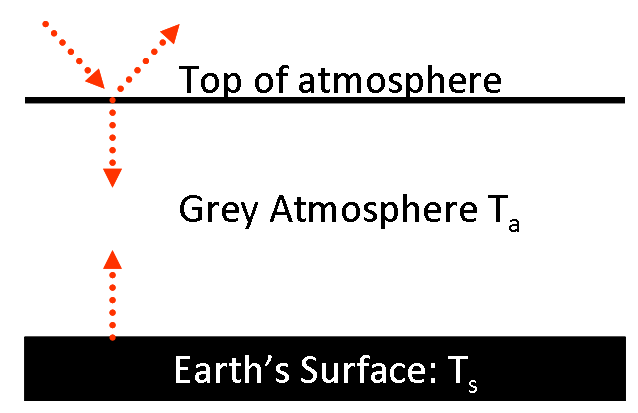

The key thing to remember is that emissivity is **wavelength** dependent.  Gases like water vapour and CO$_2$ interact with radiation at various bands in the longwave (and also the short wave in the case of water vapour).  However, in this simple model we aggregate the radiation into two bands, one for the short wave and one for the long wave.  

We neglect the small impact of water vapour and assume that in the short wave the atmosphere is transparent, while in the long wave the emissivity $\epsilon$ is 0.6, that is, 60% of the infrared radiation is absorbed by the atmosphere. 

We can now write the equations for the top of atmosphere, slab and surface:

At the top of the atmosphere, the incoming solar radiation $\frac{S_0}{4}(1-\alpha_p)$ is balanced by black body emission from the Earth $\sigma T_s^4 $, of which $1-\epsilon$ passes through the atmosphere (recall the Beer-Lambert Law) and also the emission from the atmosphere $\epsilon \sigma T_a^4$:

### Top of Atmosphere (eqn1)

\begin{equation}
\frac{S_0}{4}(1-\alpha_p) = \sigma T_s^4 (1- \epsilon ) + \epsilon \sigma T_a^4
\label{eqn:ebmtoa}
\end{equation}


Assuming we can specify the solar constant $S_0$, the albedo $\alpha_p$ and the atmospheric emissivity $\epsilon$ as external parameters, this single equation has two unknowns $T_a$ and $T_s$, the temperatures we are trying to find. So we also need a second equation for the balance at the surface:

### Surface (eqn2)
\begin{equation}
\epsilon \sigma T_a^4 + \frac{S_0}{4}(1-\alpha_p) = \sigma T_s^4 
\label{eqn:ebmsurf}
\end{equation}

See if you can derive this (refer to the class notes).

Actually, we can also write a third equation for the balance of the slab itself, this overspecifies the problem as we only need 2 of the 3 equations to solve for $T_a$ and $T_s$, but the resulting equation is nice and simple due to the fact that the atmosphere is transparent to solar radiation, thus we simply balance absorption with emission:

### Atmospheric Slab (eqn3)

\begin{equation}
\epsilon \sigma T_s^4 = 2 \epsilon \sigma T_a^4
\label{eqn:ebmatmos}
\end{equation}

Note the factor 2 on the right hand side, this is important!  We recall that the radiance in Stefan-Boltzmann's Law is integrated over the solid angle for a **hemisphere**.  The atmosphere doesn't just emit outwards to space, but also in the downward direction back towards Earth, thus over **2** hemispheres! (Otherwise the atmosphere temperature would equal that of the surface, think about it!) 

Ok, got that?  So let's play with a simple model... 

## Solving the slab equations

From eqn 3 above we see that 

\begin{equation}
T_a = \frac{T_s}{\sqrt[4]{2}}
\end{equation}

which can be substituted into either (1) or (2) [exercise show] to give:

\begin{equation}
T_s = \sqrt[4]{\frac{S_0(1-\alpha_p)}{2 \sigma (2-\epsilon)}}
\end{equation}

Let's look at this with a simple python code...

In [1]:
import numpy as np
import pandas as pd

# define the external parameters
eps=0.8   # atmospheric emissivity in infrared
alb=0.3   # albedo
S0=1370   # solar constant W/m2
sigma=5.67e-8 # SB constant

# surface temperature
eqn=S0*(1-alb)/(2*sigma*(2-eps))
Ts=np.power(eqn,0.25)

# atmospheric temperature
Ta=Ts/np.power(2,0.25)


print("Surface Temperature=",Ts," Kelvin")
print("Atmos Temperature=",Ta," Kelvin")


Surface Temperature= 289.7384127570699  Kelvin
Atmos Temperature= 243.6399926487212  Kelvin


## Questions

what happens when you set $\epsilon$=0 ?  What is the atmospheric temperature in this case? Does it make sense (refer to equation 3 above!)

now we make graph of temperature as a function of $\epsilon$ and $\alpha$



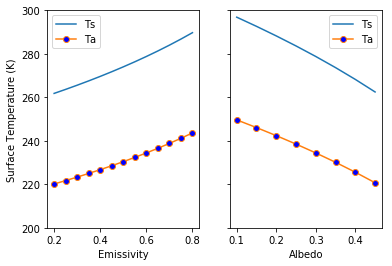

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def calcT(alb,eps):
    # surface temperature
    eqn=S0*(1-alb)/(2*sigma*(2-eps))
    Ts=np.power(eqn,0.25)

    # atmospheric temperature
    Ta=Ts/np.power(2,0.25)
    return(Ts,Ta)
    
# define the external parameters
S0=1370   # solar constant W/m2
sigma=5.67e-8 # SB constant
alb0=0.3 # default value when other param is varied
eps0=0.6 # default value when other param is varied

global S0,sigma 

# let's make emissivity an array
leps=np.arange(0.2,0.8,0.05) # min,max,inc
lalb=np.arange(0.1,0.5,0.05) 

# loop over emissivity
Tse=np.zeros(len(leps))
Tae=np.zeros(len(leps))
for i,eps in enumerate(leps):
    Tse[i],Tae[i]=calcT(alb0,eps)
    
# loop over albedo 
Tsa=np.zeros(len(lalb))
Taa=np.zeros(len(lalb))
for i,alb in enumerate(lalb):
    Tsa[i],Taa[i]=calcT(alb,eps0)
 
fig,ax=plt.subplots(1,2,sharey=True)
ax[0].plot(leps,Tse)
ax[0].plot(leps,Tae,marker='o', markerfacecolor='blue', markersize=6, )
ax[0].set_xlabel("Emissivity")
ax[0].set_ylim(200,300)
ax[0].set_ylabel("Surface Temperature (K)")
ax[0].legend(['Ts','Ta'])

ax[1].plot(lalb,Tsa)
ax[1].set_xlabel("Albedo")
ax[1].plot(lalb,Taa,marker='o', markerfacecolor='blue', markersize=6, )
ax[1].legend(['Ts','Ta'])






## Two slab model 
troposphere and stratosphere, coming soon to a notebook near you!
